In [39]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 

sns.set_style("dark")

In [2]:
digimonlist_list_path = "./../../Desktop/datasets/Digimon/DigiDB_digimonlist.csv"
movelist_list_path = "./../../Desktop/datasets/Digimon/DigiDB_movelist.csv"
supportlist_list_path = "./../../Desktop/datasets/Digimon/DigiDB_supportlist.csv"

In [10]:
digimon_list = pd.read_csv(digimonlist_list_path)
movelist_list = pd.read_csv(movelist_list_path)
supportlist_list = pd.read_csv(supportlist_list_path)

In [11]:
digimon_list.head()

,Number,Digimon,Stage,Type,Attribute,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
0,1,Kuramon,Baby,Free,Neutral,2,0,590,77,79,69,68,95
1,2,Pabumon,Baby,Free,Neutral,2,0,950,62,76,76,69,68
2,3,Punimon,Baby,Free,Neutral,2,0,870,50,97,87,50,75
3,4,Botamon,Baby,Free,Neutral,2,0,690,68,77,95,76,61
4,5,Poyomon,Baby,Free,Neutral,2,0,540,98,54,59,95,86


In [12]:
movelist_list.head()

,Move,SP Cost,Type,Power,Attribute,Inheritable,Description
0,Wolkenapalm I,3,Physical,65,Fire,Yes,"Physical attack, 65 Fire damage to one foe. 95..."
1,Wolkenapalm II,6,Physical,85,Fire,Yes,"Physical attack, 85 Fire damage to one foe. 95..."
2,Wolkenapalm III,9,Physical,105,Fire,Yes,"Physical attack, 105 Fire damage to one foe. 9..."
3,Burst Flame I,3,Magic,55,Fire,Yes,"Magic attack, 55 Fire damage to one foe. 95% a..."
4,Burst Flame II,6,Magic,75,Fire,Yes,"Magic attack, 75 Fire damage to one foe. 95% a..."


In [13]:
supportlist_list.head()

,Name,Description
0,Adroit Wisdom,Increases INT by 15%.
1,All-Rounder,"Increases ATK, DEF, INT and SPD by 5%."
2,Analyze,Increases scan values by 10%.
3,Animal Colosseum,Increases damage from Earth skills by 15%.
4,Aus Generics,Increases SPD and EVA by 25% when HP drops bel...


In [32]:
digimon_list.isnull().sum()

Number         0
Digimon        0
Stage          0
Type           0
Attribute      0
Memory         0
Equip Slots    0
Lv 50 HP       0
Lv50 SP        0
Lv50 Atk       0
Lv50 Def       0
Lv50 Int       0
Lv50 Spd       0
dtype: int64

In [33]:
movelist_list.isnull().sum()

Move                0
SP Cost             0
Type                0
Power               0
Attribute           0
Inheritable         0
Description         0
Power_to_SP_cost    1
dtype: int64

In [34]:
supportlist_list.isnull().sum()

Name           0
Description    0
dtype: int64

<h2>Task 1: Which set of moves will get Best ratio of SP Cost ?</h2>

In [16]:
movelist_list["Power_to_SP_cost"] = round(movelist_list["Power"]/movelist_list["SP Cost"], 2)

In [17]:
movelist_list.head()

,Move,SP Cost,Type,Power,Attribute,Inheritable,Description,Power_to_SP_cost
0,Wolkenapalm I,3,Physical,65,Fire,Yes,"Physical attack, 65 Fire damage to one foe. 95...",21.67
1,Wolkenapalm II,6,Physical,85,Fire,Yes,"Physical attack, 85 Fire damage to one foe. 95...",14.17
2,Wolkenapalm III,9,Physical,105,Fire,Yes,"Physical attack, 105 Fire damage to one foe. 9...",11.67
3,Burst Flame I,3,Magic,55,Fire,Yes,"Magic attack, 55 Fire damage to one foe. 95% a...",18.33
4,Burst Flame II,6,Magic,75,Fire,Yes,"Magic attack, 75 Fire damage to one foe. 95% a...",12.50


In [23]:
# retrieve the top 5 

movelist_list.sort_values(by = ["Power_to_SP_cost"], ascending = False).head(5)

,Move,SP Cost,Type,Power,Attribute,Inheritable,Description,Power_to_SP_cost
80,Heavy Strike I,3,Physical,70,Neutral,Yes,"Physical attack, 70 Neutral damage to one foe....",23.33
0,Wolkenapalm I,3,Physical,65,Fire,Yes,"Physical attack, 65 Fire damage to one foe. 95...",21.67
30,Nanomachine Break I,3,Physical,65,Thunder,Yes,"Physical attack, 65 Thunder damage to one foe....",21.67
40,Comet Hammer I,3,Physical,65,Earth,Yes,"Physical attack, 65 Earth damage to one foe. 9...",21.67
50,Wind Claw I,3,Physical,65,Wind,Yes,"Physical attack, 65 Wind damage to one foe. 95...",21.67


In [24]:
movelist_list.sort_values(by = ["Power_to_SP_cost"], ascending = False).head(5)["Move"]

80         Heavy Strike I
0           Wolkenapalm I
30    Nanomachine Break I
40         Comet Hammer I
50            Wind Claw I
Name: Move, dtype: object

<h2>Task 2: Which team of 3 digimon will have the highest attack? Defence?</h2>

In [25]:
digimon_list["Stage"].value_counts()

Mega           74
Ultimate       58
Champion       54
Rookie         38
In-Training    11
Ultra           6
Baby            5
Armor           3
Name: Stage, dtype: int64

In [26]:
digimon_list.head(6)

,Number,Digimon,Stage,Type,Attribute,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
0,1,Kuramon,Baby,Free,Neutral,2,0,590,77,79,69,68,95
1,2,Pabumon,Baby,Free,Neutral,2,0,950,62,76,76,69,68
2,3,Punimon,Baby,Free,Neutral,2,0,870,50,97,87,50,75
3,4,Botamon,Baby,Free,Neutral,2,0,690,68,77,95,76,61
4,5,Poyomon,Baby,Free,Neutral,2,0,540,98,54,59,95,86
5,6,Koromon,In-Training,Free,Fire,3,0,940,52,109,93,52,76


In [27]:
digimon_list.sort_values(by = ["Lv50 Atk"], ascending = False).head()

,Number,Digimon,Stage,Type,Attribute,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
243,244,Chaosmon,Ultra,Vaccine,Neutral,25,2,1080,129,318,94,89,188
235,236,Belphemon RM,Ultra,Virus,Dark,25,0,1780,84,247,168,109,140
195,196,Diaboromon,Mega,Free,Dark,20,2,1680,114,243,104,79,173
241,242,Beelzemon BM,Mega,Virus,Dark,25,1,1680,114,238,124,104,178
211,212,Beelzemon,Mega,Virus,Dark,22,1,1680,114,228,119,99,168


In [28]:
print("The 3 digimons with the highest attacks are: ")
print(digimon_list.sort_values(by = ["Lv50 Atk"], ascending = False).head(3)["Digimon"])

The 3 digimons with the highest attacks are: 
243        Chaosmon
235    Belphemon RM
195      Diaboromon
Name: Digimon, dtype: object


In [29]:
print("The 3 digimons with the highest defences are: ")
print(digimon_list.sort_values(by = ["Lv50 Def"], ascending = False).head(3)["Digimon"])

The 3 digimons with the highest defences are: 
181    GroundLocomon
182        Craniamon
238         Magnamon
Name: Digimon, dtype: object


<h2>Are some attributes over or under represented?</h2>

In [30]:
digimon_list.head()

,Number,Digimon,Stage,Type,Attribute,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
0,1,Kuramon,Baby,Free,Neutral,2,0,590,77,79,69,68,95
1,2,Pabumon,Baby,Free,Neutral,2,0,950,62,76,76,69,68
2,3,Punimon,Baby,Free,Neutral,2,0,870,50,97,87,50,75
3,4,Botamon,Baby,Free,Neutral,2,0,690,68,77,95,76,61
4,5,Poyomon,Baby,Free,Neutral,2,0,540,98,54,59,95,86


In [31]:
digimon_list["Type"].value_counts()

Virus      82
Vaccine    70
Data       60
Free       37
Name: Type, dtype: int64

Text(0.5, 1.0, 'Histogram plot of Attribute types')

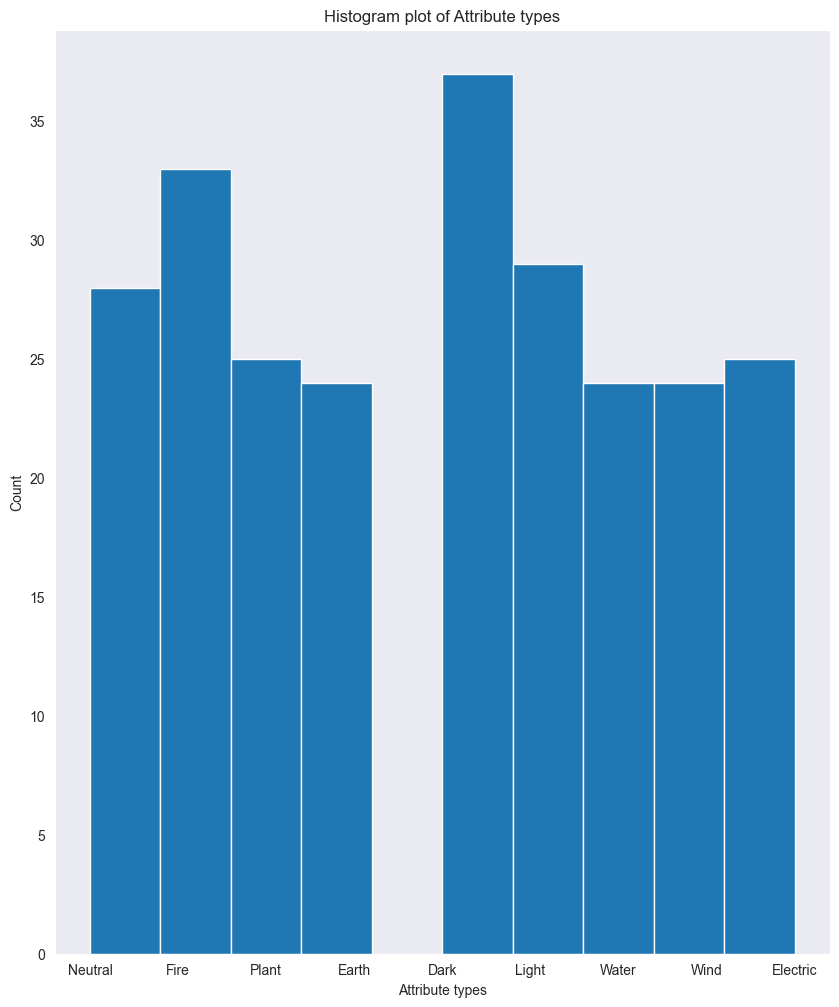

In [47]:
plt.figure(figsize = (10, 12))
plt.hist(digimon_list["Attribute"])
plt.xlabel("Attribute types")
plt.ylabel("Count")
plt.title("Histogram plot of Attribute types")

In [53]:
digimon_list["Attribute"].unique()

array(['Neutral', 'Fire', 'Plant', 'Earth', 'Dark', 'Light', 'Water',
       'Wind', 'Electric'], dtype=object)

In [56]:
print(digimon_list["Attribute"].value_counts())

Dark        37
Fire        33
Light       29
Neutral     28
Plant       25
Electric    25
Earth       24
Water       24
Wind        24
Name: Attribute, dtype: int64


In [61]:
digimon_list.corr()

C:\Users\admin\AppData\Local\Temp\ipykernel_9316\3913558550.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  digimon_list.corr()


,Number,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
Number,1.000000,0.923339,0.571901,0.626166,0.608113,0.552471,0.620177,0.560146,0.762861
Memory,0.923339,1.000000,0.355176,0.639569,0.623400,0.608372,0.611728,0.583956,0.797777
Equip Slots,0.571901,0.355176,1.000000,0.392137,0.278687,0.211450,0.466534,0.237616,0.286558
Lv 50 HP,0.626166,0.639569,0.392137,1.000000,0.070957,0.605708,0.561376,0.055314,0.317051
Lv50 SP,0.608113,0.623400,0.278687,0.070957,1.000000,-0.148365,0.169960,0.895652,0.603240
Lv50 Atk,0.552471,0.608372,0.211450,0.605708,-0.148365,1.000000,0.426901,-0.186125,0.522005
Lv50 Def,0.620177,0.611728,0.466534,0.561376,0.169960,0.426901,1.000000,0.182606,0.225921
Lv50 Int,0.560146,0.583956,0.237616,0.055314,0.895652,-0.186125,0.182606,1.000000,0.442214
Lv50 Spd,0.762861,0.797777,0.286558,0.317051,0.603240,0.522005,0.225921,0.442214,1.000000


In [64]:
digimon_list["Lv 50 HP"].corr(digimon_list["Lv50 SP"])

0.07095683963849717

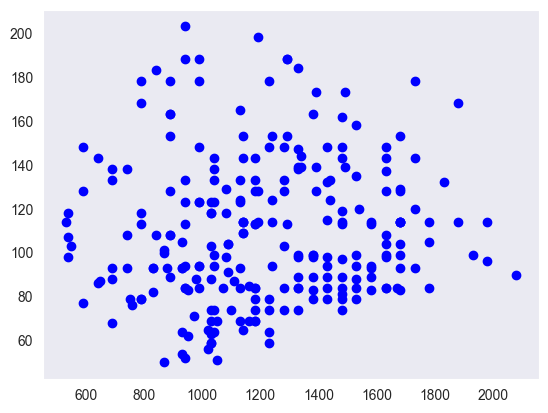

In [68]:
plt.plot(digimon_list["Lv 50 HP"],digimon_list["Lv50 SP"], "bo" )
plt.show()

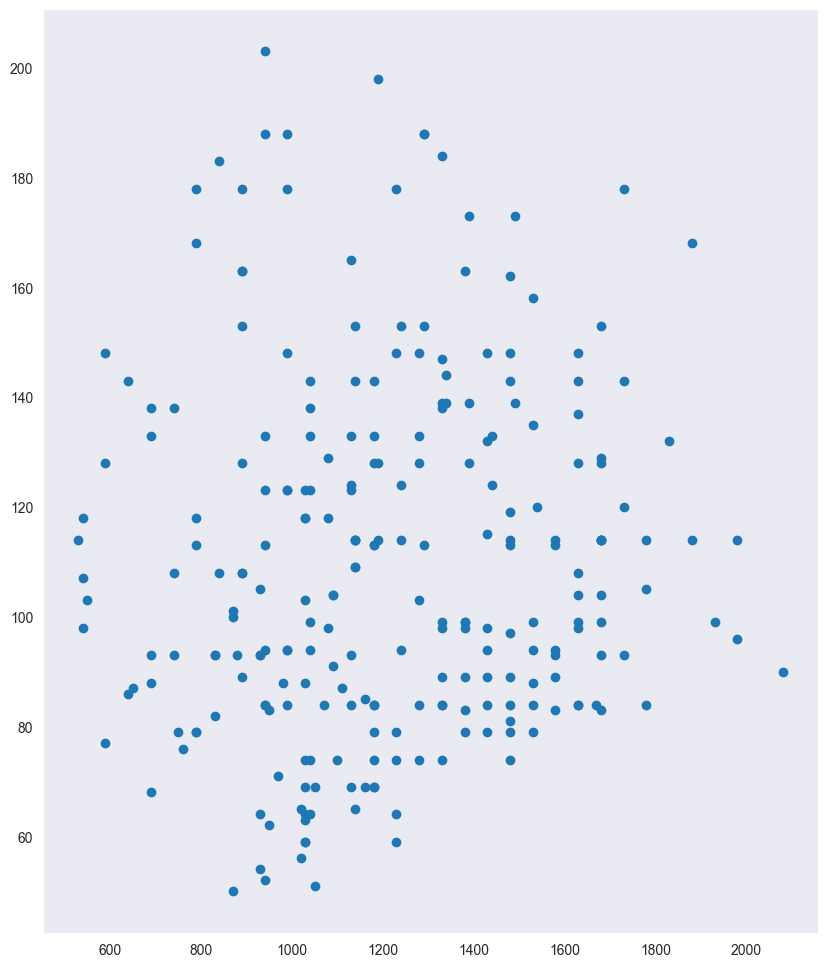

In [72]:
plt.figure(figsize = (10, 12))
plt.scatter(digimon_list["Lv 50 HP"],digimon_list["Lv50 SP"], marker = "o")
plt.show()

In [ ]:
# 